<a href="https://colab.research.google.com/github/dmsukhanov/coursera/blob/main/ImageNET_customDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code part 1
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
from keras.models import model_from_json
from keras.preprocessing import image

page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")
print(page.content)

# BeautifulSoup is an HTML parsing library

soup = BeautifulSoup(page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
#print(soup)
#print(soup.prettify())

b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

In [ ]:
#code part 1.1
bikes_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02834778")
print(bikes_page.content)

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
bikes_soup = BeautifulSoup(bikes_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

b"http://farm2.static.flickr.com/1089/537335018_9813e94757.jpg\r\nhttp://members.lycos.nl/zwawe/hpbimg/fiets3.jpg\r\nhttp://communities.canada.com/shareit/photos/bicycles/images/64838/425x286.aspx\r\nhttp://farm2.static.flickr.com/1090/1441125154_341230126c.jpg\r\nhttp://farm4.static.flickr.com/3219/2681908945_dbe4c38deb.jpg\r\nhttp://farm3.static.flickr.com/2186/2358375851_fa98bf5314.jpg\r\nhttp://farm3.static.flickr.com/2375/2463989860_28a9d6743c.jpg\r\nhttp://bluh.nl/images/portfolio/grafisch/fiets.jpg\r\nhttp://www.bakkeveen.nl/Ondernemers/Bolhuis/2003_3_22_A.jpg\r\nhttp://upload.wikimedia.org/wikipedia/commons/a/a1/A_Bicycle_in_Oxford.JPG\r\nhttp://farm1.static.flickr.com/220/503379999_8301b3ed00.jpg\r\nhttp://farm3.static.flickr.com/2266/2539943000_005b996b1e.jpg\r\nhttp://home.kooee.com.au/nobananas/images/clayton-bike-1.jpg\r\nhttp://farm1.static.flickr.com/21/26188741_0a4a18d992.jpg\r\nhttp://farm3.static.flickr.com/2085/1642604624_4ca84a32c4.jpg\r\nhttp://www.bikeracks.us/ima

In [ ]:
#code part 2
str_soup=str(soup)#convert soup to string so it can be split
type(str_soup)
split_urls=str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(split_urls))#print the length of the list so you know how many urls you have

1262


In [ ]:
#code part 2.2
bikes_str_soup=str(bikes_soup)#convert soup to string so it can be split
type(bikes_str_soup)
bikes_split_urls=bikes_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(bikes_split_urls))

1345


In [ ]:
#code part 3

!mkdir /content/train #create the Train folder
!mkdir /content/train/ships #create the ships folder
!mkdir /content/train/bikes #create the bikes folder
!mkdir /content/validation
!mkdir /content/validation/ships #create the ships folder
!mkdir /content/validation/bikes #create the bikes folder

In [ ]:

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image


0

TRAIN:


list the files inside ships directory:

img0.jpg  img3.jpg  img4.jpg  img5.jpg	img6.jpg  img8.jpg

list the files inside bikes directory:

img3.jpg  img4.jpg  img5.jpg  img6.jpg	img9.jpg

VALIDATION:


list the files inside ships directory:


list the files inside bikes directory:



In [ ]:
#code part 4

n_of_training_images=100#the number of training images to use

for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        save_path = '/content/train/ships/img'+str(progress)+'.jpg'
        urllib.request.urlretrieve(split_urls[progress],save_path)
      except:
        None

#do the same for bikes:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        save_path = '/content/train/bikes/img'+str(progress)+'.jpg'
        urllib.request.urlretrieve(bikes_split_urls[progress],save_path)
      except:
        None
        
        
#Validation data:

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        save_path = '/content/validation/ships/img'+str(progress)+'.jpg'
        urllib.request.urlretrieve(split_urls[n_of_training_images+progress],save_path)
      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not bikes_split_urls[progress] == None:
      try:
        save_path = '/content/validation/bikes/img'+str(progress)+'.jpg'
        urllib.request.urlretrieve(bikes_split_urls[n_of_training_images+progress],save_path)
      except:
        None
        
print("\nTRAIN:\n")          
print("\nlist the files inside ships directory:\n")        
!ls /content/train/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/train/bikes #list the files inside bikes
print("\nVALIDATION:\n")
print("\nlist the files inside ships directory:\n")        
!ls /content/validation/ships #list the files inside ships
print("\nlist the files inside bikes directory:\n")
!ls /content/validation/bikes #list the files inside bikes   

0
20
40
60
80
0
20
40
60
80
0
20
40
0
20
40

TRAIN:


list the files inside ships directory:

img0.jpg   img23.jpg  img33.jpg  img44.jpg  img59.jpg  img72.jpg  img92.jpg
img11.jpg  img24.jpg  img34.jpg  img46.jpg  img5.jpg   img73.jpg  img93.jpg
img12.jpg  img25.jpg  img35.jpg  img47.jpg  img60.jpg  img74.jpg  img94.jpg
img13.jpg  img26.jpg  img36.jpg  img48.jpg  img62.jpg  img76.jpg  img95.jpg
img14.jpg  img27.jpg  img38.jpg  img49.jpg  img63.jpg  img77.jpg  img96.jpg
img15.jpg  img28.jpg  img39.jpg  img4.jpg   img64.jpg  img78.jpg  img97.jpg
img16.jpg  img29.jpg  img3.jpg	 img51.jpg  img66.jpg  img7.jpg   img99.jpg
img17.jpg  img2.jpg   img40.jpg  img52.jpg  img67.jpg  img83.jpg
img18.jpg  img30.jpg  img41.jpg  img54.jpg  img69.jpg  img86.jpg
img20.jpg  img31.jpg  img42.jpg  img55.jpg  img6.jpg   img8.jpg
img22.jpg  img32.jpg  img43.jpg  img56.jpg  img70.jpg  img91.jpg

list the files inside bikes directory:

img0.jpg   img22.jpg  img36.jpg  img48.jpg  img61.jpg  img75.jpg  img8.jpg


In [ ]:
import torchvision
from torchvision import transforms
from torchvision import datasets
from torch.utils import data
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F

import os
import torch

from PIL import Image
import PIL.ImageOps

import cv2


In [ ]:
train_dir = '/content/train/'

In [ ]:
def get_labels(labels):
    txt_labels = []
    r = os.listdir(train_dir)
    for folder in r:
      txt_labels.append(folder)
    return [txt_labels[int(i)] for i in labels]

In [ ]:
text_labels = []
r = os.listdir(train_dir)
for folder in r:
  text_labels.append(folder)

In [ ]:
for i in range(len(text_labels)):
  print(text_labels[i])

bikes
ships


In [ ]:
folder = 'ships'
label = text_labels.index(folder)
print(label)

1


In [ ]:
class CustomDataSet(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        self.all_classes = os.listdir(main_dir)
        self.total_imgs = sum([len(files) for r, d, files in os.walk(self.main_dir)])

    def __len__(self):
        return self.total_imgs

    def __getitem__(self, idx):
      r = os.listdir(self.main_dir)
      for folder in r:
        folder_class = (self.main_dir+'/'+folder)
        label = text_labels.index(folder)
        img_loc = os.path.join(folder_class, os.listdir(folder_class)[idx]) 
        image = cv2.imread(img_loc, cv2.IMREAD_GRAYSCALE)
        image2 = cv2.resize(image, (224,224))
        tensor_image = (self.transform(image2)).unsqueeze(0)
        return tensor_image, label


In [ ]:
trans = transforms.Compose([transforms.ToTensor()#,
                               #transforms.Normalize((-0.0335), (0.8875))
                              ])

my_dataset = CustomDataSet(train_dir, transform=trans)
train_loader = data.DataLoader(my_dataset, batch_size=2, shuffle=False, 
                               num_workers=4, drop_last=True)

In [ ]:
trans = transforms.Compose([transforms.ToTensor(),
                            transforms.CenterCrop(224)
                               #transforms.Normalize((-0.0335), (0.8875))
                              ])

my_dataset2 = datasets.ImageFolder(train_dir, transform=trans)
train_loader = data.DataLoader(my_dataset2, batch_size=2, shuffle=False, 
                               num_workers=4, drop_last=True)

In [ ]:
my_dataset2[1][0][0].shape,len(my_dataset)

(torch.Size([224, 224]), 152)

In [ ]:
my_dataset2.class_to_idx

{'bikes': 0, 'ships': 1}

Text(0.5, 1.0, 'tensor([[0.5882, 0.5843, 0.5843,  ..., 0.6039, 0.6039, 0.6039],\n        [0.5843, 0.5843, 0.5843,  ..., 0.6078, 0.6078, 0.6078],\n        [0.5804, 0.5804, 0.5804,  ..., 0.6039, 0.6039, 0.6039],\n        ...,\n        [0.1176, 0.1294, 0.1137,  ..., 0.1961, 0.1961, 0.1882],\n        [0.1529, 0.1451, 0.1216,  ..., 0.1608, 0.1725, 0.1765],\n        [0.1333, 0.1176, 0.1255,  ..., 0.1647, 0.1294, 0.1059]])')

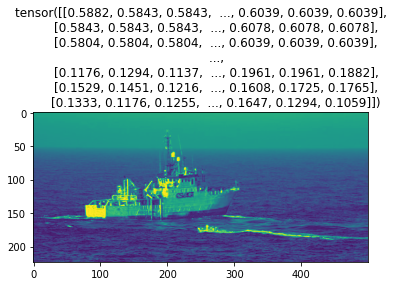

In [ ]:
test_image = my_dataset2[111][0][0]
plt.imshow(test_image)
plt.title(test_image)

In [ ]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5): 
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # Tensor Image
            ax.imshow(img.numpy())
        else:
            # PIL Image
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

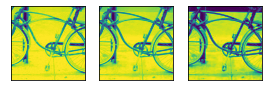

In [ ]:
X, y = next(iter(data.DataLoader(my_dataset2, batch_size=1)))
show_images(X.reshape(3,224, 224), 1, 3,titles = y); #